In [ ]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from functools import partial
import math

In [ ]:
"""
# Definir el número de ciudades a visitar.
n_cities = 20
# Definir el número de iteraciones del algoritmo.
n_it = 50
# Definir el número de hormigas.
n_hormigas = 15
# Definir alpha
alpha = 1
# Definir beta
beta = 1
# Definir Q
Q = 1000
# Definir rho
rho = 0.5

# Generar las coordenadas para n ciudades.
cities = np.random.randint(1, 100, size=(n_cities, 2))
# Calcular la matriz de distancias
dm = distance_matrix(cities, cities)
# Inicializar en 1 el valor de Tau para cada conexión.
tau = np.ones((n_cities, n_cities))
# Inicializar la matriz Eta con el inverso de la distancia entre cada par de ciudades (1/dij).
eta = np.asarray([1 / dm[i, j] for i in range(n_cities) for j in range(n_cities)]).reshape((n_cities, n_cities))
# Reemplazar el inifinito en la diagonal causado a dividir 1 entre 0 (la distancia a sí mismo).
eta = np.where(eta == np.Infinity, 0, eta)
"""

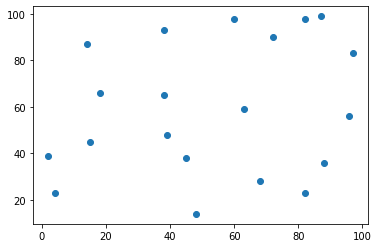

In [ ]:
cx = cities[:, 0]
cy = cities[:, 1]

fig, ax = plt.subplots()
ax.scatter(cx, cy)

In [ ]:
def recocido_simulado():
    inicializar_temperatura(U, T, L)
    k = 0
    u = U
    while temp > 0.1:
        for l in range(L):
            v = generar_vecino(u)
            if f(v) <= f(u):
                u = v
            elif aleatorio(0, 1) < e**(-(f(v)-f(u)))/t:
                u = v
        k = k + 1
        calcular_longitud(l)
        calcular_temperatura(t)
    return u
                

In [ ]:
def inicializa_temperatura():
    T = 0.1
    u = U
    Rmin = 0.9
    RA = 0
    while RA < Rmin:
        RA = cadena_markov(u)
        T = B*T
    return T

In [ ]:
def genera_caminos(cities, iterations=50, n_vendedores = np.random.randint(1,5)):
    vendedores = np.random.randint(0, n_cities-1, size=(n_vendedores, 1))
    caminos = dict()
    for i in range(iterations):
        s_cities = np.random.shuffle(cities)
        print(np.random.shuffle(cities))
        for x in range(n_cities):
            print(s_cities)
            caminos[x][np.random.randint(0, n_vendedores-1)].append(s_cities.pop())
            print(s_cities)
    return caminos
    

In [ ]:
genera_caminos(cities)

None
None


KeyError: 0

In [ ]:
aux = genera_solucion_inicial()
#np.reshape(arr, (5,5,2))
print(aux)
#for lin in aux:
    #print(np.append(lin,[lin[0]]))


[[[90  2]
  [86  3]
  [68  9]
  [42  1]]

 [[20 14]
  [66  2]
  [ 5 76]
  [48 36]]

 [[ 5 13]
  [22  9]
  [47 94]
  [79  5]]

 [[37 67]
  [68 79]
  [95  2]
  [94  4]]

 [[27 10]
  [87 70]
  [65 99]
  [28 49]]]


TypeError: 'tuple' object is not callable

In [ ]:
#Aquí comienzan las funciones
def recocido (T0, a, L, Tf):
    T = T0
    soluciones = []
    Sa = genera_solucion_inicial()
    soluciones.append(Sa)
    #print(Sa)
    while T >= Tf:
        for count in range(L):
            Sc = genera_vecino_aleatorio(Sa)
            soluciones.append(Sc)
            d = cost(Sc)-cost(Sa)
            if np.random.uniform(0,1) < math.exp(-d/T) or d < 0:
                Sa = Sc
                #print(Sc)
            #plot_sols(soluciones,cities, Sa, Sc)
        T = T*a
    return Sa

In [ ]:
def cost(ruta):
    cost = 0
    for vend in ruta:
        #print('vend', vend)
        for x in range(-1,3):
            cost += math.sqrt((vend[x][0] - vend[x+1][0])**2 + abs(vend[x][1] - vend[x+1][1])**2)
    return cost
        

In [ ]:
def genera_vecino_aleatorio(ruta):
    aux = np.copy(ruta)
    Xa = np.random.randint(0,5)
    Xb = np.random.randint(0,5)
    Ya = np.random.randint(0,4)
    Yb = np.random.randint(0,4)
    #print(aux[Xa][Ya], aux[Xb][Yb])
    aux2 = np.copy(aux[Xa][Ya])
    aux[Xa][Ya] = np.copy(aux[Xb][Yb])
    aux[Xb][Yb] = aux2
    #print(aux[Xa][Ya], aux[Xb][Yb])
    return aux

In [ ]:
def genera_solucion_inicial():
    np.random.shuffle(cities)
    arr = np.reshape(cities, (5,4,2))
    return arr

In [ ]:
def plot_sols(soluciones, cities, mejor, ultimo_mejor):
    """
    Función que dibuja la mejor ruta hasta el momento y las rutas de la última iteración.
    :param soluciones: lista de rutas de la última iteración.
    :param cities: posición de las ciudades para graficar.
    :param mejor: la mejor ruta encontrada hasta el momento.
    :param ultimo_mejor: índice de la mejor ruta de la iteración.
    :return:
    """
    n_soluciones = len(soluciones) + 1
    fig, ax = plt.subplots(math.ceil(n_soluciones/2), 2, figsize=(10,15))
    ax.scatter(cx, cy, c='r')
    for sol in soluciones:
        for vend in sol:
            ax.plot(vend)
        plt.show()
            
    
            
    '''# Calcular numero de hormigas y agregar 1 por la mejor solución.
    n_soluciones = len(soluciones) + 1
    # Separar coordenadas para graficar.
    cx = cities[:, 0]
    cy = cities[:, 1]
    # Definir una figura de tamaño fijo.
    fig, axes = plt.subplots(math.ceil(n_soluciones/2), 2, figsize=(10,15))

    for i, ax in enumerate(axes.flatten()):
        # Dibujar los puntos de las ciudades.
        if i==0:
            # Dibujar ciudades.
            ax.scatter(cx, cy, c='r')
            # Agregar título.
            ax.set_title('Mejor solución')
            # Dibujar ruta.
            ax.plot(cx[mejor + [mejor[0][0]]], cy[mejor + [mejor[0][0]]], c='r')
            ax.set_aspect('auto')
        elif i==1:
            # Dibujar ciudades
            ax.scatter(cx, cy, c='r')
            # Agregar título.
            ax.set_title('Mejor de la iteración')
            # Sacar el mejor de la ruta con el índice.
            sol = soluciones.pop(ultimo_mejor)
            # Dibujar ruta.
            ax.plot(cx[sol + [sol[0][0]]], cy[sol + [sol[0][0]]], c='y')
            ax.set_aspect('auto')
        elif soluciones:
            # Dibujar ciudades
            ax.scatter(cx, cy, c='r')
            # Sacar el primero de la lista.
            sol = soluciones.pop(0)
            # Dibujar ruta.
            ax.plot(cx[sol + [sol[0][0]]], cy[sol + [sol[0][0]]], c='b')
            ax.set_aspect('auto')

    # Agregar espacios en blanco entre gráficas.
    plt.subplots_adjust(hspace=0.5)
    plt.show()'''


IndexError: index 76 is out of bounds for axis 0 with size 20

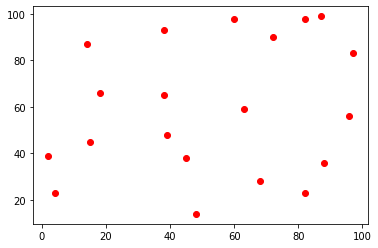

In [ ]:
graficarMejorSolucion(recocido(40,.9,10, .1),cities)

[63 59 97 83 96 56 88 36 63 59]
[[63 59]
 [97 83]
 [96 56]
 [88 36]
 [63 59]]


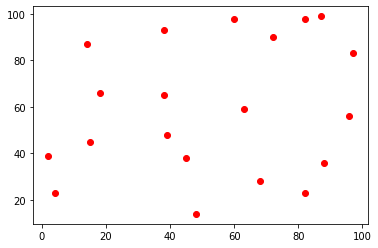

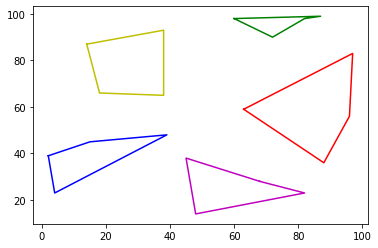

In [ ]:
def graficarMejorSolucion(caminos, ciudades):
    #minIndex = np.argmin(resultados[0])
    #solucion = resultados[1][minIndex]
    
    #caminos = dividirCamionsDeVendedores(solucion[0], solucion[1])
    aux = np.append(caminos[0],caminos[0][0])
    print(aux)
    print(np.reshape(aux, (5,2)))
    caminos = [np.reshape(np.append(cam,cam[0]), (5,2)) for cam in caminos]
    #print(caminos)
    aux = caminos
    cx = ciudades[:, 0]
    cy = ciudades[:, 1] 
    #print(cx, cy)
    
    s = plt.scatter(cx, cy, c='r')
    
    '''for idx, val in enumerate(caminos):
        #s = plt.plot(caminos[idx][:,0],caminos[idx][:,0],c='r',zorder=1, lw=2)
        plt.plot(caminos[idx][:,0],caminos[idx][:,0],c='r')
        plt.scatter(caminos[idx][:,0],caminos[idx][:,0],s=120)

        pass
    '''
    fig, ax = plt.subplots()
    ax.plot(aux[0][:,0], aux[0][:,1], c='r')
    ax.plot(aux[1][:,0], aux[1][:,1], c='g')
    ax.plot(aux[2][:,0], aux[2][:,1], c='b')
    ax.plot(aux[3][:,0], aux[3][:,1], c='y')
    ax.plot(aux[4][:,0], aux[4][:,1], c='m')

    #print(resultados)
    
#graficarMejorSolucion(recocidoSimulado(iteraciones, T, u, L, alpha, rmin, beta), ciudades)
graficarMejorSolucion(recocido(40,.9,10, .1),cities)

In [ ]:
soluciones

NameError: name 'soluciones' is not defined

In [ ]:
aux

array([[[82, 44],
        [63, 99],
        [82, 44],
        [20, 37]],

       [[95, 74],
        [10, 17],
        [75, 60],
        [95, 74]],

       [[95, 74],
        [59,  8],
        [91, 63],
        [91, 95]],

       [[91, 95],
        [95, 74],
        [95, 74],
        [67, 52]],

       [[91, 95],
        [10, 17],
        [60, 49],
        [59,  8]]])

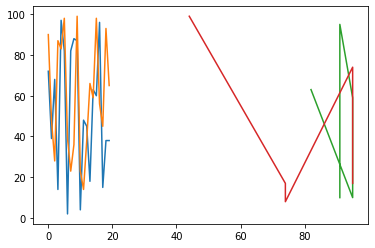

In [ ]:
aux2 = np.copy(aux[0])
plt.plot(cities)
plt.plot(aux[:,0],aux[:,1])

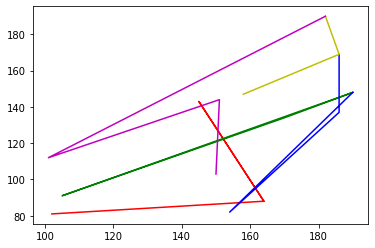

In [ ]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(aux[0][:,0]+aux[0][0,0], aux[0][:,1]+aux[0][0,1], c='r')
ax.plot(aux[1][:,0]+aux[1][0,0], aux[1][:,1]+aux[1][0,1], c='g')
ax.plot(aux[2][:,0]+aux[2][0,0], aux[2][:,1]+aux[2][0,1], c='b')
ax.plot(aux[3][:,0]+aux[3][0,0], aux[3][:,1]+aux[3][0,1], c='y')
ax.plot(aux[4][:,0]+aux[4][0,0], aux[4][:,1]+aux[4][0,1], c='m')

#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

plt.show()